In [1]:
import pandas as pd

df = pd.read_csv('earthquakes.csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-10-16T12:19:44.762Z,-31.1714,-177.0966,10.000,5.3,mb,65.0,88.0,2.032,0.55,...,2024-10-16T14:19:04.040Z,Kermadec Islands region,earthquake,10.12,1.875,0.070,68.0,reviewed,us,us
1,2024-10-16T12:19:27.538Z,-31.2926,-177.3049,10.000,5.0,mb,61.0,86.0,2.093,0.49,...,2024-10-16T13:38:29.040Z,Kermadec Islands region,earthquake,10.90,1.870,0.072,61.0,reviewed,us,us
2,2024-10-16T09:39:59.182Z,52.5655,-163.3902,10.000,5.3,mww,142.0,98.0,2.088,1.02,...,2024-10-16T13:50:13.679Z,"235 km SE of Akutan, Alaska",earthquake,6.96,1.835,0.057,30.0,reviewed,us,us
3,2024-10-16T08:53:22.463Z,36.1367,139.8059,74.591,4.7,mb,50.0,115.0,1.351,1.13,...,2024-10-16T13:23:14.441Z,"4 km N of Sakai, Japan",earthquake,6.91,5.531,0.093,35.0,reviewed,us,us
4,2024-10-16T08:06:54.526Z,60.3442,-151.3044,33.700,3.2,ml,NaN,NaN,NaN,0.31,...,2024-10-16T08:28:05.040Z,"1 km WNW of Kasilof, Alaska",earthquake,NaN,0.400,NaN,NaN,automatic,ak,ak


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19224 entries, 0 to 19223
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             19224 non-null  object 
 1   latitude         19224 non-null  float64
 2   longitude        19224 non-null  float64
 3   depth            19224 non-null  float64
 4   mag              19224 non-null  float64
 5   magType          19224 non-null  object 
 6   nst              18671 non-null  float64
 7   gap              18671 non-null  float64
 8   dmin             18630 non-null  float64
 9   rms              19224 non-null  float64
 10  net              19224 non-null  object 
 11  id               19224 non-null  object 
 12  updated          19224 non-null  object 
 13  place            19224 non-null  object 
 14  type             19224 non-null  object 
 15  horizontalError  18601 non-null  float64
 16  depthError       19224 non-null  float64
 17  magError    

In [12]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [13]:
import geopandas as gpd

geometry = gpd.points_from_xy(df.longitude, df.latitude)

gdf = gpd.GeoDataFrame(df, geometry=geometry)
gdf.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,geometry
0,2024-10-16T12:19:44.762Z,-31.1714,-177.0966,10.000,5.3,mb,65.0,88.0,2.032,0.55,...,Kermadec Islands region,earthquake,10.12,1.875,0.070,68.0,reviewed,us,us,POINT (-177.0966 -31.1714)
1,2024-10-16T12:19:27.538Z,-31.2926,-177.3049,10.000,5.0,mb,61.0,86.0,2.093,0.49,...,Kermadec Islands region,earthquake,10.90,1.870,0.072,61.0,reviewed,us,us,POINT (-177.3049 -31.2926)
2,2024-10-16T09:39:59.182Z,52.5655,-163.3902,10.000,5.3,mww,142.0,98.0,2.088,1.02,...,"235 km SE of Akutan, Alaska",earthquake,6.96,1.835,0.057,30.0,reviewed,us,us,POINT (-163.3902 52.5655)
3,2024-10-16T08:53:22.463Z,36.1367,139.8059,74.591,4.7,mb,50.0,115.0,1.351,1.13,...,"4 km N of Sakai, Japan",earthquake,6.91,5.531,0.093,35.0,reviewed,us,us,POINT (139.8059 36.1367)
4,2024-10-16T08:06:54.526Z,60.3442,-151.3044,33.700,3.2,ml,NaN,NaN,NaN,0.31,...,"1 km WNW of Kasilof, Alaska",earthquake,NaN,0.400,NaN,NaN,automatic,ak,ak,POINT (-151.3044 60.3442)


# Exploratory Data Analysis (EDA)

In [14]:
gdf['type'].unique()

array(['earthquake'], dtype=object)

In [15]:
df['locationSource'].value_counts()

,count
locationSource,
us,16811
pr,1006
ak,553
tx,227
hv,209
ci,202
nc,105
nn,51
uu,20


In [16]:
df[['depth', 'mag']].describe()

,depth,mag
count,19224.000000,19224.000000
mean,78.086014,4.266609
std,126.881522,0.593728
min,-3.370000,3.000000
25%,10.000000,4.100000
50%,29.515000,4.300000
75%,82.466250,4.600000
max,671.043000,7.600000


In [17]:
gdf.isnull().sum()

,0
time,0
latitude,0
longitude,0
depth,0
mag,0
magType,0
nst,553
gap,553
dmin,594
rms,0


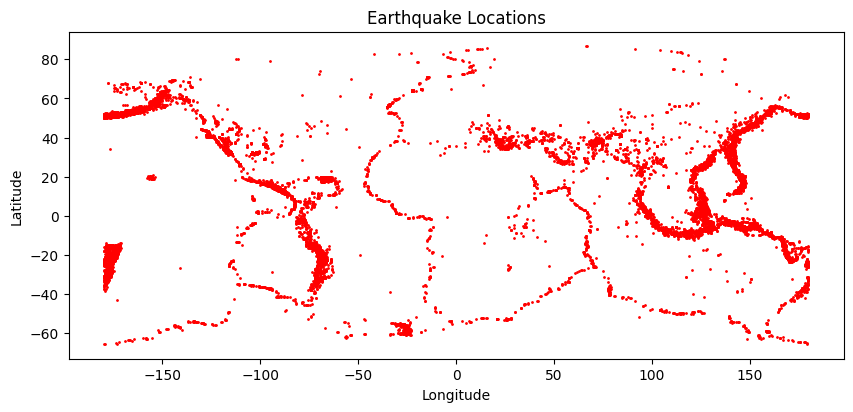

In [18]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(20,15))
gdf.plot(color='red', markersize=1, figsize=(10,10))
plt.title('Earthquake Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [19]:
gdf['place'].head()

,place
0,Kermadec Islands region
1,Kermadec Islands region
2,"235 km SE of Akutan, Alaska"
3,"4 km N of Sakai, Japan"
4,"1 km WNW of Kasilof, Alaska"


In [20]:
'235 km SE of Akutan, Alaska'.rsplit(',')[-1].strip()

'Alaska'

In [24]:
gdf['location'] = gdf['place'].str.rsplit(',').str[-1].str.strip()
gdf['location'].nunique()

278

## Magnitude Distribution

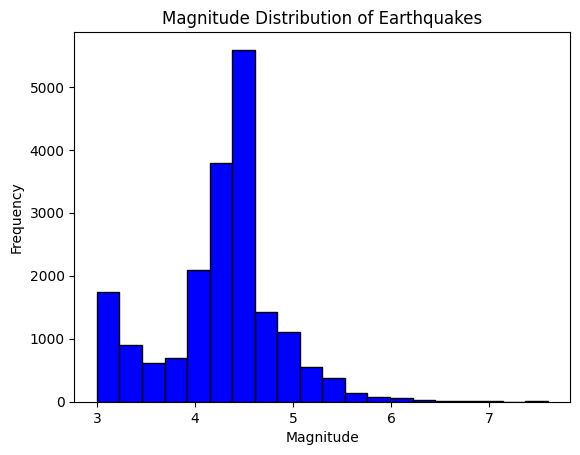

In [28]:
gdf['mag'].hist(edgecolor='black', color='blue', bins=20)
plt.title('Magnitude Distribution of Earthquakes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

## Depth Analysis

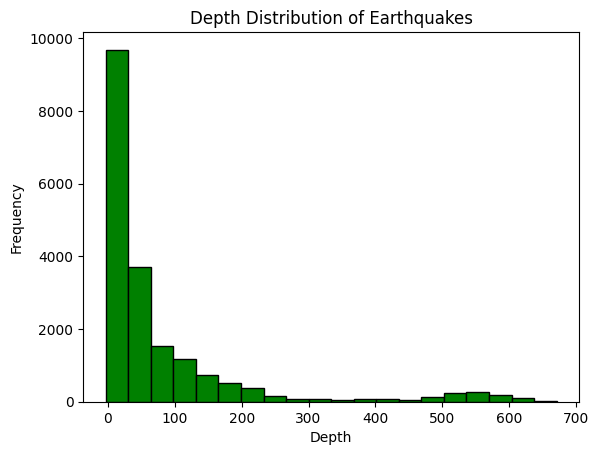

In [29]:
gdf['depth'].hist(edgecolor='black', color='green', bins=20)
plt.title('Depth Distribution of Earthquakes')
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

## Earthquake by Country

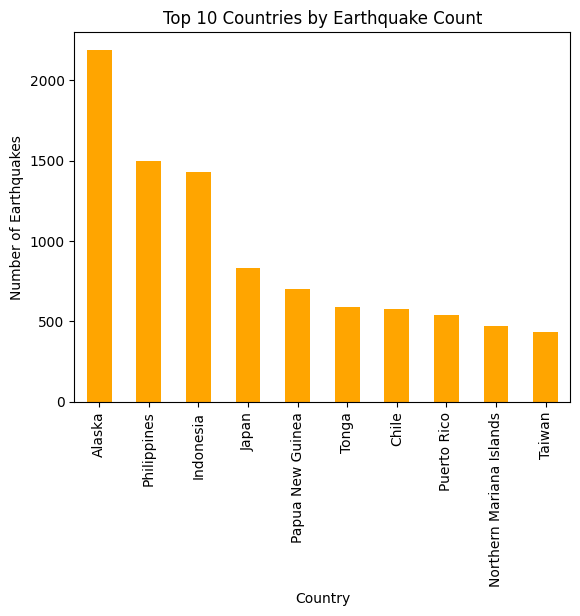

In [31]:
country_counts = gdf['location'].value_counts()
country_counts[:10].plot(kind='bar', color='orange')
plt.title('Top 10 Countries by Earthquake Count')
plt.xlabel('Country')
plt.ylabel('Number of Earthquakes')
plt.show()

## Time Series Analysis of Earthquakes

In [32]:
gdf['time'].dtype

dtype('O')

In [33]:
gdf['time'] = pd.to_datetime(gdf['time'])
gdf['time'].dtype

datetime64[ns, UTC]

In [34]:
gdf.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,geometry,location
0,2024-10-16 12:19:44.762000+00:00,-31.1714,-177.0966,10.000,5.3,mb,65.0,88.0,2.032,0.55,...,earthquake,10.12,1.875,0.070,68.0,reviewed,us,us,POINT (-177.0966 -31.1714),Kermadec Islands region
1,2024-10-16 12:19:27.538000+00:00,-31.2926,-177.3049,10.000,5.0,mb,61.0,86.0,2.093,0.49,...,earthquake,10.90,1.870,0.072,61.0,reviewed,us,us,POINT (-177.3049 -31.2926),Kermadec Islands region
2,2024-10-16 09:39:59.182000+00:00,52.5655,-163.3902,10.000,5.3,mww,142.0,98.0,2.088,1.02,...,earthquake,6.96,1.835,0.057,30.0,reviewed,us,us,POINT (-163.3902 52.5655),Alaska
3,2024-10-16 08:53:22.463000+00:00,36.1367,139.8059,74.591,4.7,mb,50.0,115.0,1.351,1.13,...,earthquake,6.91,5.531,0.093,35.0,reviewed,us,us,POINT (139.8059 36.1367),Japan
4,2024-10-16 08:06:54.526000+00:00,60.3442,-151.3044,33.700,3.2,ml,NaN,NaN,NaN,0.31,...,earthquake,NaN,0.400,NaN,NaN,automatic,ak,ak,POINT (-151.3044 60.3442),Alaska


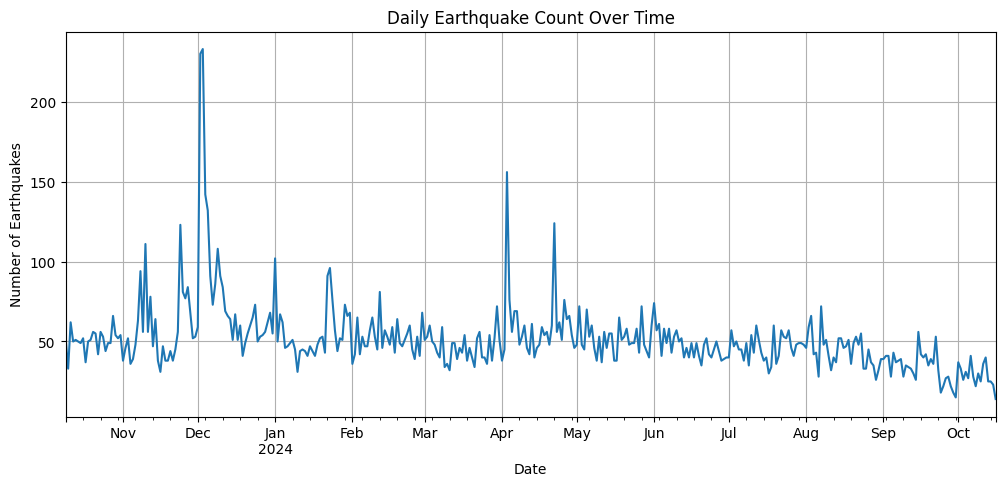

In [37]:
daily_count = gdf.resample('D', on='time').size()

daily_count.plot(figsize=(12,5))
plt.title('Daily Earthquake Count Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Earthquakes')
plt.grid()
plt.show()

## Maginitude vs Depth

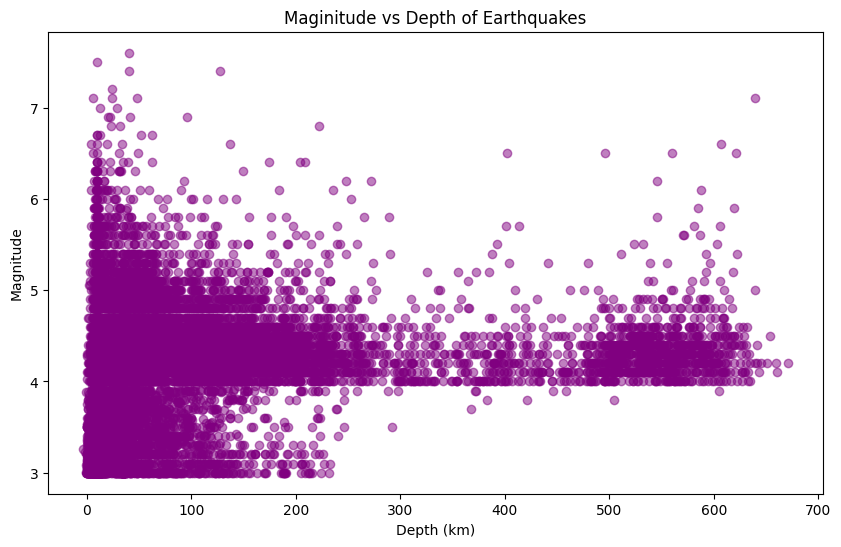

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(gdf['depth'], gdf['mag'], color='purple', alpha=0.5)
plt.title('Maginitude vs Depth of Earthquakes')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.show()

## Analyzing the Earthquake Status

In [39]:
gdf['status'].value_counts()

,count
status,
reviewed,19185
automatic,39


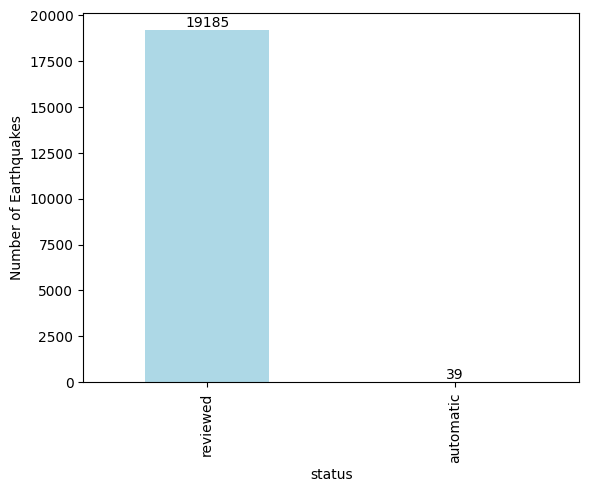

In [43]:
ax = gdf['status'].value_counts().plot(kind='bar', color='lightblue')
ax.bar_label(ax.containers[0])
plt.ylabel('Number of Earthquakes')
plt.show()

## Earthquake Count by Hour

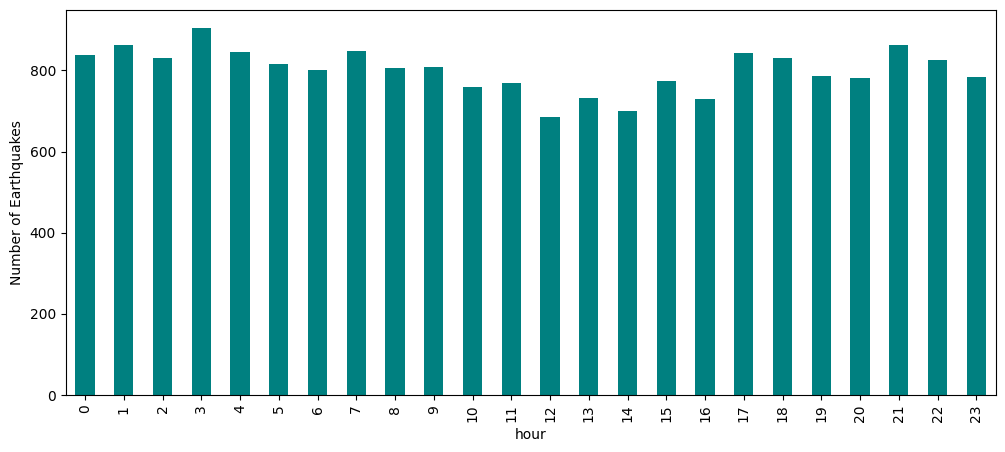

In [48]:
gdf['hour'] = gdf['time'].dt.hour

hourly_counts = gdf['hour'].value_counts().sort_index()
hourly_counts.plot(kind='bar', color='teal', figsize=(12,5))
plt.ylabel('Number of Earthquakes')
plt.show()

# Geospatial Visualization

In [50]:
print(gdf.crs)

None


In [51]:
gdf = gdf.set_crs('EPSG:4326')

In [53]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [54]:
world = gpd.read_file('/content/ne_110m_admin_0_countries.zip')
world.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58, 2..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57952 24.2455, 51.75744 24.29407,..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."


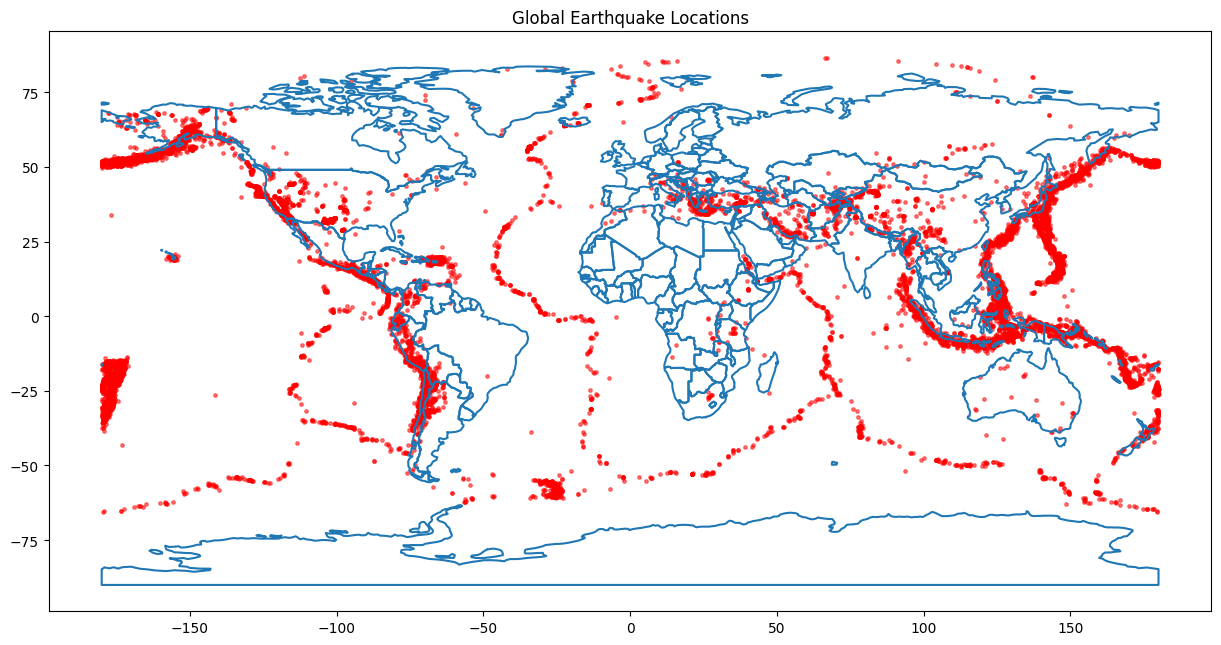

In [55]:
fig, ax = plt.subplots(figsize=(15,10))

world.boundary.plot(ax=ax)
gdf.plot(ax=ax, marker='o', color='red', markersize=6, alpha=0.5)
plt.title('Global Earthquake Locations')
plt.show()

In [57]:
!pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 3.6 MB/s eta 0:00:00


In [58]:
# Creating an Interactive map
#   -- 'folium', 'matplotlib' and 'mapclassify' packages are required for 'explore()'
gdf.explore(columns='mag', marker_kwds={'color': 'red', 'radius':3}, tooltip=True)

Output hidden; open in https://colab.research.google.com to view.

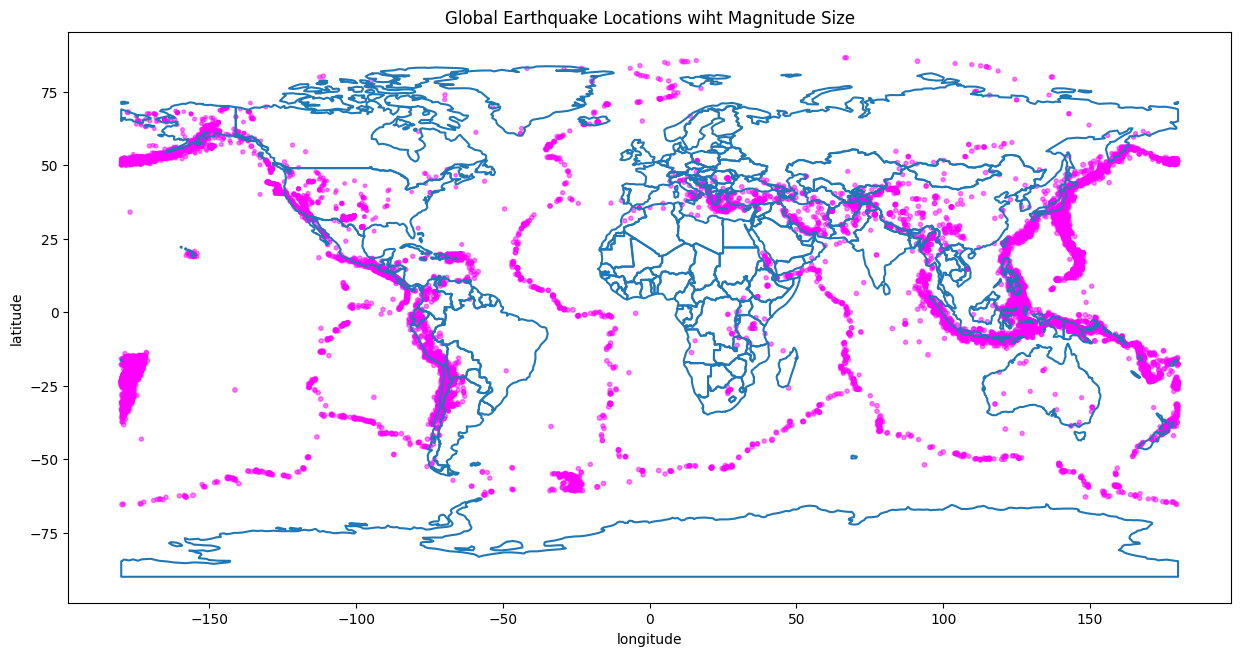

In [61]:
fig, ax = plt.subplots(figsize=(15,10))

world.boundary.plot(ax=ax)
gdf.plot.scatter(ax=ax, x='longitude', y='latitude',  marker='o', color='magenta', s=gdf['mag']*2, alpha=0.5)
plt.title('Global Earthquake Locations wiht Magnitude Size')
plt.show()

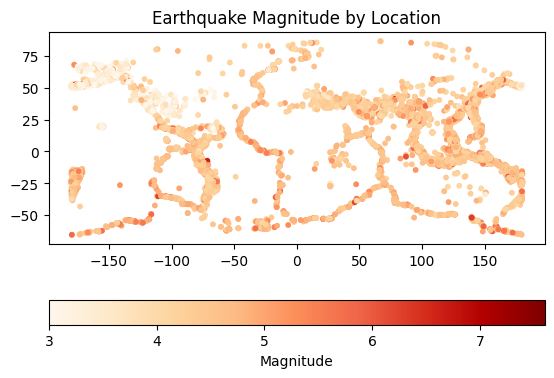

In [62]:
gdf.plot(column='mag', cmap='OrRd', markersize=10, legend=True,
         legend_kwds={'label': 'Magnitude', 'orientation': 'horizontal'})
plt.title('Earthquake Magnitude by Location')
plt.show()

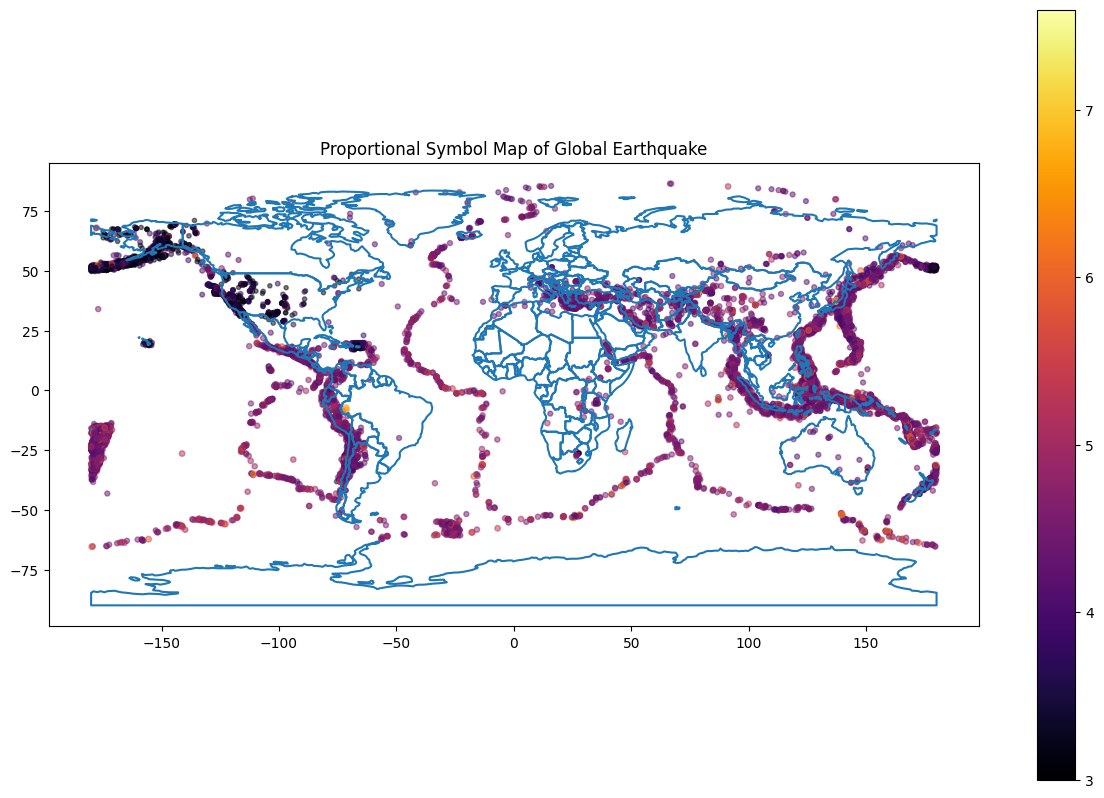

In [63]:
fig, ax = plt.subplots(figsize=(15,10))

world.boundary.plot(ax=ax)
gdf.plot(ax=ax, column='mag', marker='o', cmap='inferno', markersize=gdf['mag']*3, alpha=0.5, legend=True)
plt.title('Proportional Symbol Map of Global Earthquake')
plt.show()

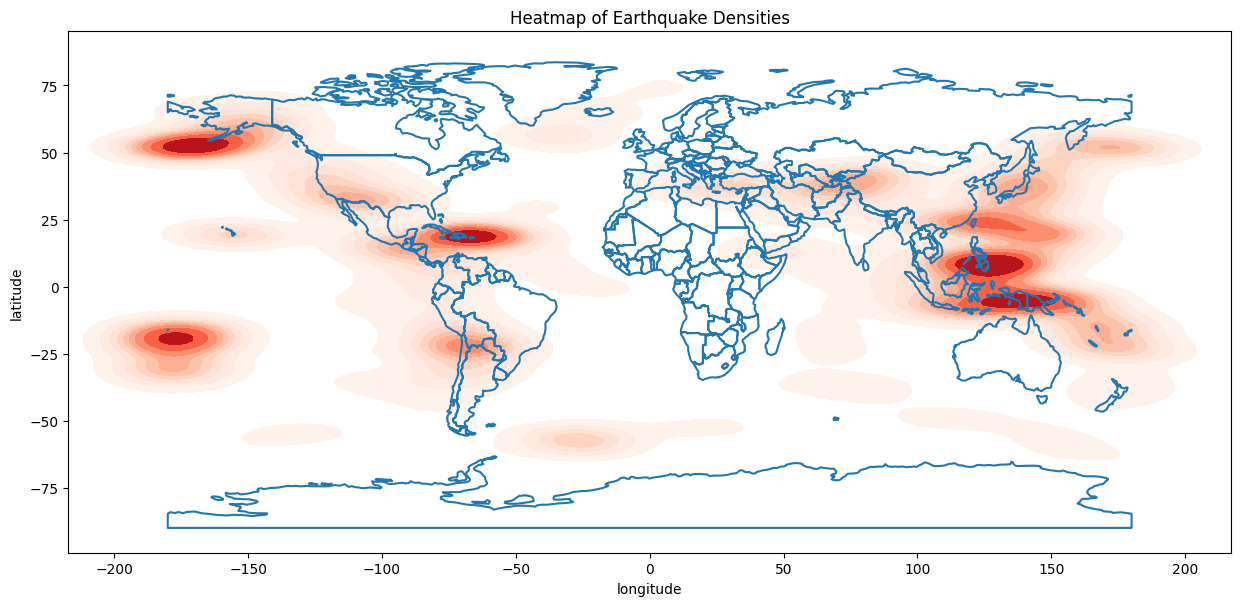

In [65]:
# Heatmap of Earthquake locations
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10))
world.boundary.plot(ax=ax)
sns.kdeplot(x=gdf['longitude'], y=gdf['latitude'], cmap='Reds', fill=True, bw_adjust=0.5, ax=ax)
plt.title('Heatmap of Earthquake Densities')
plt.show()